# nbpreview

In [1]:
import pandas as pd
import pymc as pm

import model
import plots

Thanks for checking out `nbpreview`.
This example notebook is inspired by an example
in _[Bayesian Analysis with Python]_ by Osvaldo Martin.
A more detailed breakdown of how `nbpreview` renders notebooks,
examples,
and command-line options
may be found in the [documentation].

[bayesian analysis with python]: https://www.amazon.com/Bayesian-Analysis-Python-Introduction-probabilistic-ebook/dp/B07HHBCR9G
[documentation]: https://nbpreview.readthedocs.io/

## Load data

In [2]:
babies_data = pd.read_csv(
    "https://github.com/aloctavodia/BAP/blob/master/code/data/babies.csv?raw=true"
).rename(columns={"Lenght": "Length"})
months_of_interest = list(range(0, 13, 4))
(
    babies_data.groupby("Month")
    .agg(
        mean_length=("Length", "mean"),
        median_length=("Length", "median"),
        mean_std=("Length", "std"),
        measurement_count=("Month", "count"),
    )
    .loc[months_of_interest]
)

,mean_length,median_length,mean_std,measurement_count
Month,,,,
0,49.458333,49.25,1.824285,48
4,62.060606,62.50,2.548767,33
8,68.809524,69.00,2.677714,42
12,74.456522,74.50,2.549122,23


## Make model

In [3]:
with model.model_baby_length(babies_data):
    babies_idata = pm.sample(tune=2_000, return_inferencedata=True)
    babies_idata.extend(pm.sample_posterior_predictive(babies_idata))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, gamma, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 19 seconds.


## Plots

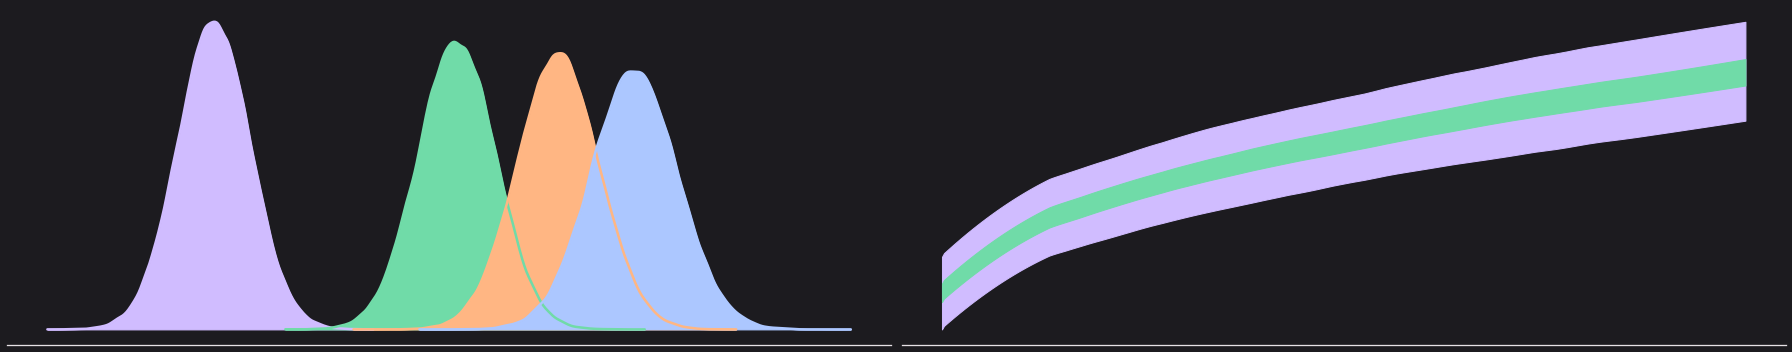

In [4]:
plots.plot_dist_and_hdi(
    babies_data,
    babies_idata=babies_idata,
    months=months_of_interest,
    hdi_probs=[0.50, 0.99],
);